In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Download necessary NLTK datasets
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [18]:
# Load the dataset (dataset source: https://www.kaggle.com/datasets/fastcurious/twitter-new-dataset-2024-march-data)
df = pd.read_json('tweets.json')

df.head()

,type,id,url,twitterUrl,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,...,bookmarkCount,isReply,author,extendedEntities,entities,isRetweet,isQuote,media,quoteId,quote
0,tweet,1762265250987201024,https://x.com/FmGuerralves/status/176226525098...,https://twitter.com/FmGuerralves/status/176226...,"""Historic visit by French Minister for Home Af...",0,0,1,0,25.0,...,0,False,"{'type': 'user', 'userName': 'FmGuerralves', '...",{'media': [{'display_url': 'pic.twitter.com/vU...,"{'hashtags': [{'indices': [131, 138], 'text': ...",False,False,[https://pbs.twimg.com/media/GHTS4jca4AAbb7m.j...,NaN,NaN
1,tweet,1762265102085165568,https://x.com/CynthiaGur93764/status/176226510...,https://twitter.com/CynthiaGur93764/status/176...,😐😙😆🧏‍♀️😩👨‍🦱\n wear interview sometimes fast co...,0,0,0,0,NaN,...,0,False,"{'type': 'user', 'userName': 'CynthiaGur93764'...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN
2,tweet,1762264840154857472,https://x.com/nelsonakange/status/176226484015...,https://twitter.com/nelsonakange/status/176226...,The Directorate of Technical Cooperation in Af...,0,1,0,0,44.0,...,0,True,"{'type': 'user', 'userName': 'nelsonakange', '...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN
3,tweet,1762264888053821696,https://x.com/NikolajMeedom/status/17622648880...,https://twitter.com/NikolajMeedom/status/17622...,It almost seems that a foreign policy based on...,0,0,1,0,32.0,...,0,False,"{'type': 'user', 'userName': 'NikolajMeedom', ...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,True,[],1.762170e+18,"{'type': 'tweet', 'id': '1762170363306201342',..."
4,tweet,1762264739139510784,https://x.com/GaryGevisser/status/176226473913...,https://twitter.com/GaryGevisser/status/176226...,Subject: Reason for optimism is that it is now...,0,1,0,0,46.0,...,0,True,"{'type': 'user', 'userName': 'GaryGevisser', '...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN


## Exploring Preprocessing

Tokenisation is the process of splitting a text into smaller units, such as words or terms. 

Stopwords are trivial words like “I”, “the”, “you”, etc. that appear so frequently in the text that they may distort many NLP operations without adding much valuable information. So almost always you will have to remove stopwords from the corpus as part of your preprocessing.

Lemmatisation means reducing a word to its base or root form. For example, the word “running” is lemmatised to “run”.

Stemming is similar to lemmatisation, but it is a crude rule-based process that could produce words that are not valid in the language. E.g, "Territories" becomes "territori".

In [20]:
import re
def clean_tweet(tweet):
    # Replace HTML entities
    tweet = re.sub(r'&amp;', '&', tweet)
    
    # Remove URLs
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    
    # Remove emojis
    # tweet = re.sub(r'[\U00010000-\U0010ffff]', '', tweet)
    
    return tweet

# Select a sample tweet
example_tweet = clean_tweet(df['text'].iloc[0])
print(f"Original Tweet:\n{example_tweet}\n")

# Tokenisation
tokens = word_tokenize(example_tweet)
print(f"After Tokenization:\n{tokens}\n")

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(f"After Removing Stopwords:\n{filtered_tokens}\n")

# Removing punctuation
filtered_tokens_no_punctuation = [word for word in filtered_tokens if word.isalnum()]
print(f"After Removing Punctuation:\n{filtered_tokens_no_punctuation}\n")

# Lemmatisation 
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens_no_punctuation]
print(f"After Lemmatization:\n{lemmatized_tokens}\n")

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens_no_punctuation]
print(f"After Stemming:\n{stemmed_tokens}\n")


Original Tweet:
"Historic visit by French Minister for Home Affairs & Overseas Territories, @GDarmanin, to Australia, marking a new chapter in #France-#Australia cooperation. Engaging discussions on climate resilience in Pacific, cybercrime, civil protection, and police collaboration. 🇫🇷🇦🇺 

After Tokenization:
['``', 'Historic', 'visit', 'by', 'French', 'Minister', 'for', 'Home', 'Affairs', '&', 'Overseas', 'Territories', ',', '@', 'GDarmanin', ',', 'to', 'Australia', ',', 'marking', 'a', 'new', 'chapter', 'in', '#', 'France-', '#', 'Australia', 'cooperation', '.', 'Engaging', 'discussions', 'on', 'climate', 'resilience', 'in', 'Pacific', ',', 'cybercrime', ',', 'civil', 'protection', ',', 'and', 'police', 'collaboration', '.', '🇫🇷🇦🇺']

After Removing Stopwords:
['``', 'Historic', 'visit', 'French', 'Minister', 'Home', 'Affairs', '&', 'Overseas', 'Territories', ',', '@', 'GDarmanin', ',', 'Australia', ',', 'marking', 'new', 'chapter', '#', 'France-', '#', 'Australia', 'cooperation', '

## Preprocessing

In [30]:
def clean_and_process_tweet(tweet):
    # Clean tweet
    tweet = re.sub(r'&amp;', '&', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    # Tokenization
    tokens = word_tokenize(tweet)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Removing punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Lowercase
    tokens = [word.lower() for word in tokens]
    return tokens

df['processed_tweets'] = df['text'].apply(clean_and_process_tweet)

## Explorative Data Analysis (EDA)
- Frequency distribution of words
- Word cloud
- Textblob
- Tweet length distribution
- LDA

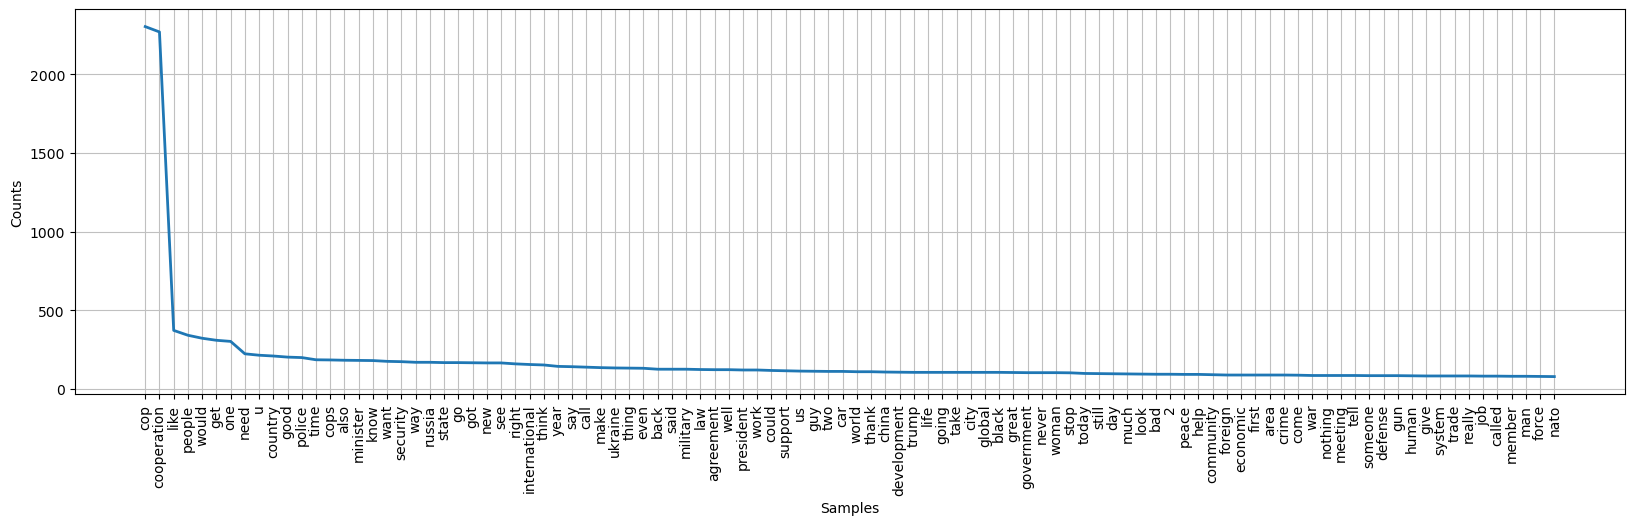

In [31]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Flatten the list of processed tweets to a single list containing all words
all_words = [word for tokens in df['processed_tweets'] for word in tokens]

# Compute the frequency distribution of the words
fdist = FreqDist(all_words)

# Plot the most common words
fdist.plot(100, cumulative=False)
plt.show()


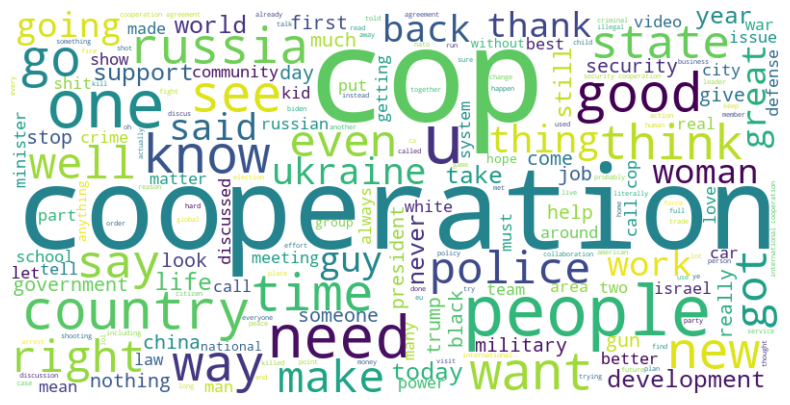

In [35]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: >

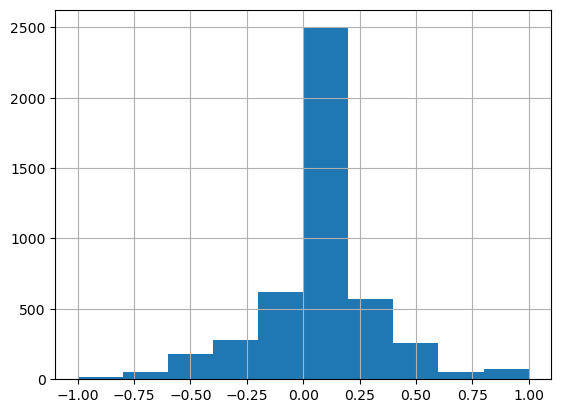

In [36]:
from textblob import TextBlob

# Compute sentiment scores (polarity) and add them to the DataFrame
df['sentiment'] = df['processed_tweets'].apply(lambda tokens: TextBlob(' '.join(tokens)).sentiment.polarity)

# Overview of sentiment distribution
df['sentiment'].hist()


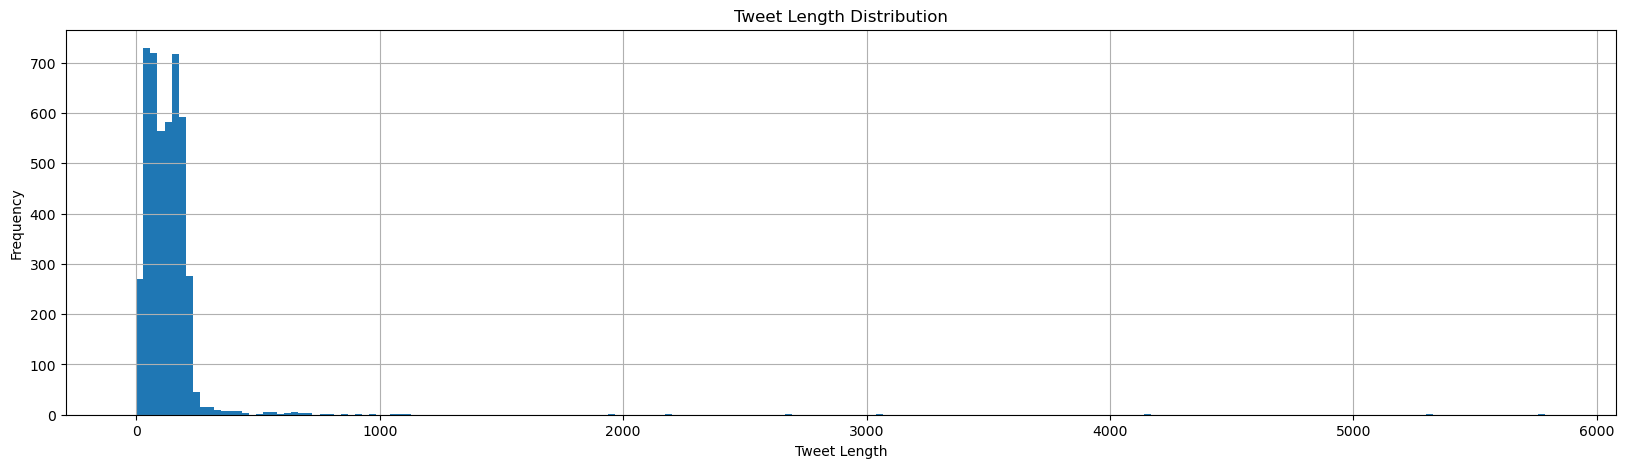

In [44]:
# Calculate tweet lengths
df['tweet_length'] = df['processed_tweets'].apply(lambda x: len(' '.join(x)))


# Plot distribution
plt.figure(figsize=(20, 5))
df['tweet_length'].hist(bins=200)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


### Latent Dirichlet Allocation (LDA)

- LDA is a generative probabilistic model that assumes each document is a mixture of topics and each word in the document is attributable to one of the document’s topics.
- Groups observations into unobserved (i.e., hidden) groups to help explain why certain parts of the data appear similar. 
- Useful in text mining for discovering topics in a corpus

LDA posits that each document within a corpus can be described as a mixture of various topics. In turn, these topics are characterised by a distribution over words. If a corpus contains $D$ documents, LDA models each document $d$ as a combination of topic probabilities. It assumes a fixed set of $K$ topics shared across the entire corpus.

### Assumptions

1. **Similarity in Documents:** Documents sharing similar topics tend to use a similar group of words.
2. **Discovery of Latent Topics:** Topics can be discovered by examining the groups of words that frequently co-occur across documents.


### Process
LDA can be used to organise and understand a large corpora of text data even if we do not know what the texts are about. Imagine you have a huge library of unlabelled books and you want to organise them, but you are unsure wehre to start as the books cover various subjects.

- LDA assumes each book discusses a mix of various topics, and there are only a set number of topics across all books.
- LDA pretends to rewrite each book, and decides on $N$ number of words to rewrite each books based off the distribution of the lengths of the original books.
- LDA then chooses the topic distribution for each document, $\theta$.
- LDA then generates words for the rewritten book by selecting a topic based off the box's topic distribution, and then selecting a word based off the topic's word distribution. The choice of words is initially random, but will learn to improve over time.
- LDA will start to notice patterns, such as words like 'apple', 'recipe' will appear together often in a similar topic, and then it will start to update the topic's word distribution to reflect this. It will also update the topic distribution for each book.
- LDA ends up with a model that tells us:
  - The topics found across all books (it cannot name the topics, but it can tell us the words that make up the topics)
  - The mixture of these topics for each book.
  
  note: this is unsupervised learning, so LDA doesn't know what the topics are, it just finds patterns in the data.

### Mathematical Formulation

The mathematical backbone of LDA involves the following steps for each document in the corpus:

1. **Document Length ($N$):** Choose $N \sim Poisson(\xi)$, determining the number of words in the document.
2. **Topic Distribution ($\theta$):** Choose $\theta \sim Dirichlet(\alpha)$, the distribution over topics for the document.
3. **Word Generation:** For each word position $i$ in the document,
   - Select a topic $z_{di} \sim Multinomial(\theta)$.
   - Choose a word $w_{di}$ from the topic's word distribution $p(w_{di} | z_{di}, \beta)$.

- **$\alpha$ and $\beta$:** These are hyperparameters that shape the Dirichlet distributions for topics across documents and words across topics, respectively.

### Inference and Parameter Estimation

Given the observed words in documents, LDA infers:

- **Topic Assignments ($z_{di}$):** Which topic is responsible for each word.
- **Topic Distributions ($\theta$):** The mix of topics in each document.
- **Word Distributions ($\beta$):** Which words are most likely for each topic.

#### Update Mechanisms

- **Gibbs Sampling:** Iteratively samples topic assignments, refining estimates of $\theta$ and $\beta$.
- **Variational Inference:** Optimizes a simpler distribution to approximate the true posterior distribution of topics.

### Understanding Hyperparameters ($\alpha$, $\beta$)

- **$\alpha$ (Document-Topic Density):** Controls the distribution of topics within documents. Higher $\alpha$ values lead to a more even mixture of topics.
- **$\beta$ (Topic-Word Density):** Influences how many words are significant for each topic. Lower $\beta$ values make topics more distinct by limiting the set of important words.

### Dirichlet Distributions

$$
Dir(\theta|\alpha) = \frac{1}{B(\alpha)} \prod_{k=1}^{K} \theta_{k}^{\alpha_k - 1}
$$

where $B(\alpha)$ is the beta function, and $K$ is the number of topics.

### Goal of LDA

Deduce the set of topics, their distribution across documents, and the distribution of words within these topics by maximising the joint likelihood of the observed and hidden variables, given the data and model parameters.

### Uses

- **Topic Modelling in Texts**: Discovering abstract "topics" within a collection of documents.
- **Content Categorisation**: Automatically sorting documents into predefined topics.
- **Information Retrieval**: Finding documents similar to a query document.



In [50]:
from gensim import corpora, models
import gensim

# Prepare a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(df['processed_tweets'])
corpus = [dictionary.doc2bow(text) for text in df['processed_tweets']]

# Apply LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
topics = ldamodel.print_topics(num_words=4)
for i, topic in enumerate(topics):
    print("------------------------------------")
    print(f"Tweet: {df['text'].iloc[i]}")
    print(f"Topic: {topic}")
    



Tweet: "Historic visit by French Minister for Home Affairs &amp; Overseas Territories, @GDarmanin, to Australia, marking a new chapter in #France-#Australia cooperation. Engaging discussions on climate resilience in Pacific, cybercrime, civil protection, and police collaboration. 🇫🇷🇦🇺 https://t.co/vU1qCHouDl, Topics: (0, '0.044*"cop" + 0.008*"like" + 0.006*"would" + 0.004*"law"')
Tweet: 😐😙😆🧏‍♀️😩👨‍🦱
 wear interview sometimes fast cooperation used, Topics: (1, '0.043*"cop" + 0.010*"cooperation" + 0.010*"people" + 0.007*"would"')
Tweet: The Directorate of Technical Cooperation in Africa be abolished and its functions, along with those of the Technical Aids Corps, transferred to an appropriate Department in the Ministry of Foreign Affairs., Topics: (2, '0.025*"cooperation" + 0.008*"cop" + 0.005*"time" + 0.003*"year"')
Tweet: It almost seems that a foreign policy based on harassment, violence and war instead of friendship and cooperation is bad in the long run, Topics: (3, '0.043*"cooperati